In [2]:
!pip install scipy pandas numpy matplotlib scikit-learn fsspec huggingface_hub


[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as lm

# Load the data
df = pd.read_csv("hf://datasets/hugginglearners/data-science-job-salaries/ds_salaries.csv")

c:\Users\mcmsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. GENERAL SALARY DATA:

In [8]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

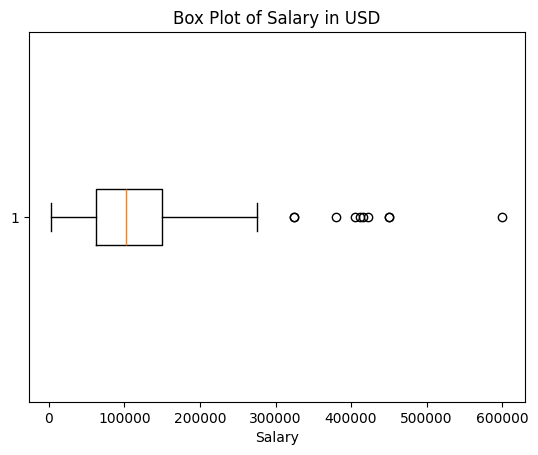

In [11]:
plt.boxplot(df['salary_in_usd'], vert=False)
plt.title('Box Plot of Salary in USD')
plt.xlabel('Salary')
plt.show()

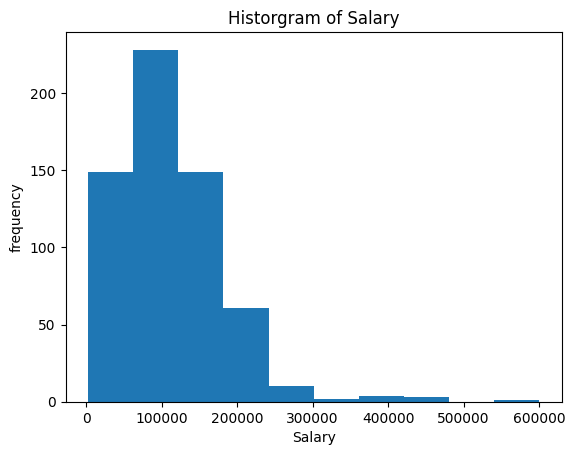

In [12]:
plt.hist(df['salary_in_usd'])
plt.title('Historgram of Salary in USD')
plt.xlabel('Salary')
plt.ylabel('frequency')
plt.show()

As seen in the Box Plot and Historam above, the mean is greater than the median. The visualizations show a tail on the left side meaning a right-skewed distribution and there is a single peak in the second bin of the histogram. It is easy in the box plot to see outliers to the left (outliers of very high salaries). The salaries in usd range from 2859 to 600000 with the the middle 50% of the salaries falling between 62726 (Q1) and 150000 (Q3).

#2 Effect of Experience on Salary

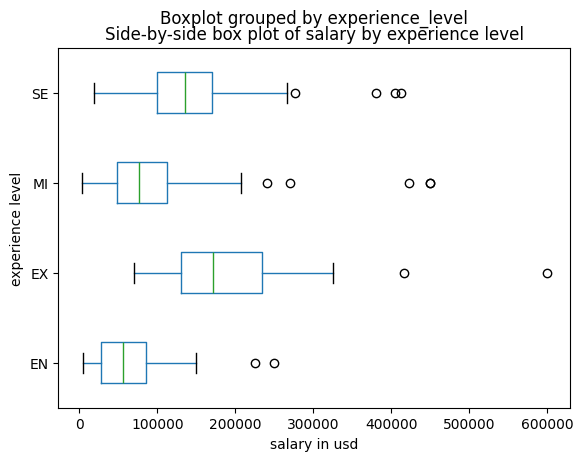

In [20]:
df.boxplot(column='salary_in_usd', by='experience_level', vert=False, grid=False)
plt.title('Side-by-side box plot of salary by experience level')
plt.xlabel('salary in usd')
plt.ylabel('experience level')
plt.show()


In [22]:
mean_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].describe()

print(mean_salary_by_experience)



                  count           mean            std      min       25%  \
experience_level                                                           
EN                 88.0   61643.318182   44395.541126   4000.0   27505.0   
EX                 26.0  199392.038462  117071.255697  69741.0  130006.5   
MI                213.0   87996.056338   63901.057478   2859.0   48000.0   
SE                280.0  138617.292857   57691.978337  18907.0  100000.0   

                       50%        75%       max  
experience_level                                 
EN                 56500.0   85425.75  250000.0  
EX                171437.5  233750.00  600000.0  
MI                 76940.0  112000.00  450000.0  
SE                135500.0  170000.00  412000.0  


All experience levels have a few outliers of higher salary values. From the data, we see that EX level has the highest mean and median. The salaries for the EX level tend to be higher over all. The box plots show that even Q1 for the EX level is greater than Q3 for experience levels EN and MI. Comparing mean salary values from highest to lowest it goes: EX, SE, MI, and then EN. The salaries for those with EN experience tend to be the lowest as seen in the box plot by looking at the IQR being the smallest and having the lowest values. The data overall seems to be consistent for all experience levels that they are slightly skewed to the right, some experience levels more skewed than others. The mean for each experience level is higher than the median. Although still skewed to the right, the salaries for experience level of SE is most symmetric. From this data, we can conclude that their is a relationship between salary and experience level.